## Cuisine prediction using recipe-ingredient data

### 1. Proposal

In this project, we aim to design a prediction system that uses recipe-ingredient data to predict the cuisine of a given recipe. We aim to utilize and consequently compare techniques from following domains: Simple (baseline) heuristics, Machine Learning, and Network-based heuristics

**Techniques we would try:**

1. Simple heuristics (these will serve as our baseline models)
    1. Baseline #1: ​For each ingredient belonging to the given test ingredient list, find the cuisine in which this ingredient is used the most. Among all such cuisines, pick the most frequently occurring cuisine
    2. Baseline #2: ​Rank the set of training recipes based on number of ingredients common with test ingredient list. Assign weights to recipes based on their rank and add to scores of their corresponding cuisines. Finally, choose the cuisine with the highest score
2. Machine Learning Domain
    1. Models such as ​Neural Networks, SVMs​ to be evaluated
    2. Models such as ​Neural Networks, SVMs​ to be evaluated with ​Node2Vec
    embeddings​ as features (where each node corresponds to an ingredient; and the
    graph is the unipartite projection recipe-ingredient bipartite network)
3. Network-based heuristics
    1. Do ​clustering​ on ingredient-ingredient network (projection of original bipartite
    recipe-ingredient network) using hierarchical clustering algorithms. We try to choose clusters at a level such that #clusters = #cuisines in our train set
    We ​analyze​ if these generated clusters have one-to-one correlation with different cuisines. If yes, we can use these clusters to create a prediction heuristic in which the cuisine having most number of test ingredients (i.e. the cluster having most number of nodes out of a given set of nodes) is picked
    2. Do ​clustering​ of ingredients using ​K-means​ on Node2Vec embeddings of ingredient-ingredient network(we set K = # cuisines). We ​analyze​ if these generated clusters have one-to-one correlation with different cuisines. If yes, we can use these clusters to create a prediction heuristic in which the cuisine having most number of test ingredients (i.e. the cluster having most number of nodes out of a given set of nodes) is picked
    3. Consider the recipe-ingredient bipartite network. For every ingredient in test list, we do: add ​w​ to scores of cuisines of recipes that are at ​distance​ of 1 from that ingredient, add ​w/2​ to scores of cuisines of recipes that are at ​distance​ of 3 from that ingredient and so on. This is done for each ingredient in the test list and the cuisine with highest score is chosen.

### 2. Getting to know the data

Print statistics about the train data

Total number of recipes: 39774
Number of cuisines: 20
Number of ingredients: 6714


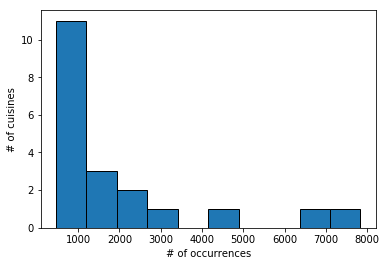

Summary statistics of above graph
            series
count    20.000000
mean   1988.700000
std    2041.558772
min     467.000000
25%     791.750000
50%    1082.000000
75%    2652.750000
max    7838.000000


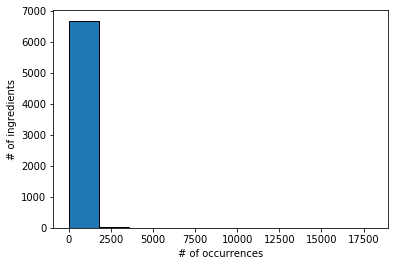

Summary statistics of above graph
             series
count   6714.000000
mean      63.788353
std      388.355948
min        1.000000
25%        1.000000
50%        4.000000
75%       20.000000
max    18049.000000
Average number of ingredients per recipe: 10.7677125761
Std. dev. number of ingredients per recipe: 4.42892189306


In [17]:
import json
import numpy as np

cuisines = set()
ingredients = set()

cuisine_count_map = {}
ingredient_count_map = {}

num_ingredients_per_recipe = []

def show_hist_of_dict(count_map, y_label, x_label):
    import matplotlib.pyplot as plt
    % matplotlib inline
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.hist(count_map.values(), ec='black')
    plt.show()
    
    # print summary statistics
    print('Summary statistics of above graph')
    import pandas as pd
    series = {'series': pd.Series(count_map.values())}
    data_frame = pd.DataFrame(series)
    print(data_frame.describe())


with open('whats-cooking/train.json', 'r') as file:
    data = json.load(file)
    
    # print number of recipes
    print('Total number of recipes: {}'.format(len(data)))
    
    for recipe in data:
    
        # stats on number of cuisines
        cuisines.add(recipe['cuisine'])
        if recipe['cuisine'] not in cuisine_count_map:
            cuisine_count_map[recipe['cuisine']] = 0
        cuisine_count_map[recipe['cuisine']] += 1
        
        # stats on number of ingredients
        num_ingredients_per_recipe.append(len(recipe['ingredients']))
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)
            
            if ingredient not in ingredient_count_map:
                ingredient_count_map[ingredient] = 0
            ingredient_count_map[ingredient] += 1
    
    print('Number of cuisines: {}'.format(len(cuisines)))
    print('Number of ingredients: {}'.format(len(ingredients)))
    
    # show histogram of ingredients and cuisines
    show_hist_of_dict(cuisine_count_map, '# of cuisines', '# of occurrences')
    show_hist_of_dict(ingredient_count_map, '# of ingredients', '# of occurrences')
    
    # print average number of ingredients per recipe
    print('Average number of ingredients per recipe: {}'.format(np.mean(num_ingredients_per_recipe)))
    print('Std. dev. number of ingredients per recipe: {}'.format(np.std(num_ingredients_per_recipe)))

Print statistics about the test data

Total number of recipes: 9944
Number of ingredients: 4484


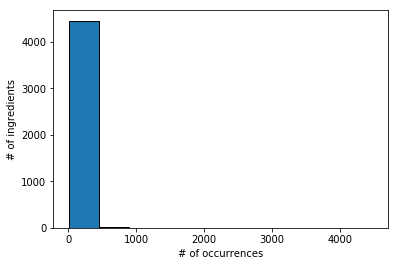

Summary statistics of above graph
            series
count  4484.000000
mean     23.950714
std     117.785328
min       1.000000
25%       1.000000
50%       3.000000
75%      11.000000
max    4485.000000
Statistics on number of ingredients per recipe:
Average number of ingredients per recipe: 10.7999798874
Std. dev. number of ingredients per recipe: 4.46692907371
            series
count  9944.000000
mean     10.799980
std       4.467154
min       1.000000
25%       8.000000
50%      10.000000
75%      13.000000
max      50.000000


In [21]:
import json
import numpy as np

ingredients = set()
ingredient_count_map = {}
num_ingredients_per_recipe = []

def show_hist_of_dict(count_map, y_label, x_label):
    import matplotlib.pyplot as plt
    % matplotlib inline
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.hist(count_map.values(), ec='black')
    plt.show()
    
    # print summary statistics
    print('Summary statistics of above graph')
    import pandas as pd
    series = {'series': pd.Series(count_map.values())}
    data_frame = pd.DataFrame(series)
    print(data_frame.describe())


with open('whats-cooking/test.json', 'r') as file:
    data = json.load(file)
    
    # print number of recipes
    print('Total number of recipes: {}'.format(len(data)))
    
    for recipe in data:
            
        # stats on number of ingredients
        num_ingredients_per_recipe.append(len(recipe['ingredients']))
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)
            
            if ingredient not in ingredient_count_map:
                ingredient_count_map[ingredient] = 0
            ingredient_count_map[ingredient] += 1
    
    print('Number of ingredients: {}'.format(len(ingredients)))
    
    # show histogram of ingredients and cuisines
    show_hist_of_dict(ingredient_count_map, '# of ingredients', '# of occurrences')
    
    # print average number of ingredients per recipe
    print('Statistics on number of ingredients per recipe:')
    print('Average number of ingredients per recipe: {}'.format(np.mean(num_ingredients_per_recipe)))
    print('Std. dev. number of ingredients per recipe: {}'.format(np.std(num_ingredients_per_recipe)))
    import pandas as pd
    series = {'series': pd.Series(num_ingredients_per_recipe)}
    data_frame = pd.DataFrame(series)
    print(data_frame.describe())

### Create a separate train-test split from original train data

Although we will evaluate results of each model on Kaggle's hidden test set, we here would also create a separate train-test split using the training set from Kaggle so that we can do our own analysis properly. This is necessary since Kaggle's test set is hidden and we don't have access to it, so we can only get the accuracy result on that by submitting on Kaggle and no other metric can be evaluated as such; but if we create our own train-test split we can do a more in-depth analysis

In [2]:
import random
import json

# ratio of original data to be held out
test_percent = 0.3

with open('whats-cooking/train.json', 'r') as file:
    data = json.load(file)
    random.shuffle(data)
    
    test_len = int(test_percent * len(data))
    test_split = data[:test_len]
    train_split = data[test_len:]
    
    with open('my_train_split.json', 'w') as outfile:
        json.dump(train_split, outfile, indent=4)
    with open('my_test_split.json', 'w') as outfile:
        json.dump(test_split, outfile, indent=4)

In [4]:
# cross-check
files = ['my_train_split.json', 'my_test_split.json', 'whats-cooking/train.json']

for filename in files:
    with open(filename, 'r') as infile:
        data = json.load(infile)
        print('{} has {} entries'.format(filename, len(data)))

my_train_split.json has 27842 entries
my_test_split.json has 11932 entries
whats-cooking/train.json has 39774 entries


### Baseline

#### Baseline #1
For each ingredient belonging to the given test ingredient list, find the cuisine in which this ingredient is used the most. Among all such cuisines, pick the most frequently occurring cuisine

In [ ]:
import json

class Baseline_1_Model:
    def train(self, train_file):
        

In [33]:
import json

ingredient_cuisine_count_map = {}
ingredients = set()

with open('whats-cooking/train.json', 'r') as file:
    data = json.load(file)    
    
    for recipe in data:
        for ingredient in recipe['ingredients']:  
            ingredients.add(ingredient)
            if ingredient not in ingredient_cuisine_count_map:
                ingredient_cuisine_count_map[ingredient] = {}
            if recipe['cuisine'] not in ingredient_cuisine_count_map[ingredient]:
                ingredient_cuisine_count_map[ingredient][recipe['cuisine']] = 0
            ingredient_cuisine_count_map[ingredient][recipe['cuisine']] += 1

In [34]:
import operator

def most_common(lst):
    return max(set(lst), key=lst.count)

def most_used_cuisine_of_ingredient(ingredient):
    return max(ingredient_cuisine_count_map[ingredient].iteritems(), key=operator.itemgetter(1))[0]
    
# Baseline 1
with open('baseline_1_submission.csv', 'w') as out_file:
    out_file.write('id,cuisine\n')
    with open('whats-cooking/test.json', 'r') as file:
        data = json.load(file)
        for recipe in data:
            candidate_cuisines = []
            for ingredient in recipe['ingredients']:
                if ingredient not in ingredients:
                    # skip if unseen during training
                    continue
                candidate_cuisines.append(most_used_cuisine_of_ingredient(ingredient))
            prediction = most_common(candidate_cuisines)

            out_file.write('{},{}\n'.format(recipe['id'], prediction))

Submitted the results of above baseline on Kaggle and got a an accuracy of 53.04%